<a href="https://colab.research.google.com/github/andrewRowlinson/data-science/blob/master/football/pass_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 4.5 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=9c7e1b7ab2a6d08c07a0233b1bad0a07e67439da4ffd3d6a2d8e701aeaced407
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


<BarContainer object of 10 artists>

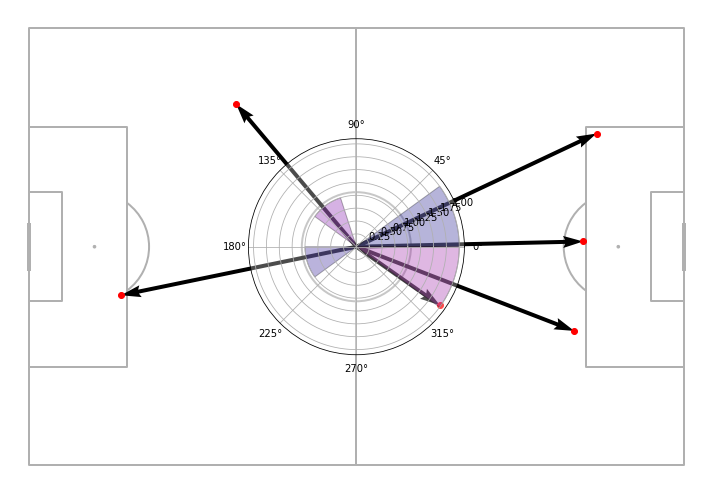

In [2]:
from mplsoccer import Pitch
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

# plot some random data on a pitch
p = Pitch()
fig, ax = p.draw(figsize=(10, 10*p.ax_aspect))
size = 6
xstart = [60] * size
ystart = [40] * size
xend = np.random.uniform(0, 120, size=size)
yend = np.random.uniform(0, 80, size=size)
p.arrows(xstart, ystart, xend, yend, ax=ax)
p.scatter(xend, yend, ax=ax, c='red')

# parameters
num_bins = 10
width = 2*np.pi/num_bins
angle, distance = p.calculate_angle_and_distance(xstart, ystart, xend, yend)

# bin angles
stats_angle = binned_statistic(angle, angle, statistic='count', bins=num_bins, range=(0, 2*np.pi))
bin_edges = stats_angle.bin_edges
count = stats_angle.statistic

# bin distance
stats_distance = binned_statistic(angle, distance, statistic='mean', bins=num_bins, range=(0, 2*np.pi))
mean_distance = np.nan_to_num(stats_distance.statistic)
cmap = plt.get_cmap('plasma_r')
colors = cmap(mean_distance / mean_distance.max())

ax_polar = fig.add_axes([0.35, 0.35, 0.3, 0.3], polar=True)
ax_polar.patch.set_alpha(0.3)
ax_polar.bar(bin_edges[:-1] + width/2, count, width=width, color=colors, edgecolor='black', alpha=0.3)